In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a=pd.read_csv('C:\\Users\\varun\\Downloads\\final_data1.csv')

In [3]:
a.isnull().sum()

Unnamed: 0_x       0
FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
OriginAirportID    0
DestAirportID      0
ArrTime            0
CRSArrTime         0
ArrDel15           0
Dest               0
ArrDelayMinutes    0
Origin             0
time               0
Unnamed: 0_y       0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
date               0
airport            0
dtype: int64

In [4]:
a.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)

In [5]:
b=a['DepDel15'].value_counts()

([<matplotlib.patches.Wedge at 0x1b9b9ebe940>,
 [Text(-0.8879487725070035, 0.6492664918223534, ''),
  Text(0.8879487725070033, -0.6492664918223535, '')])

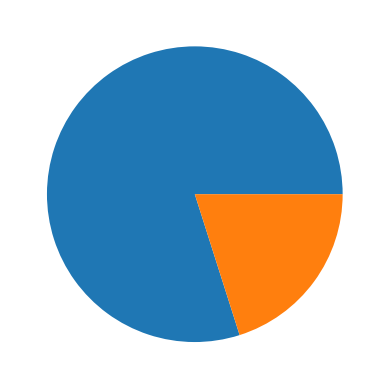

In [6]:
plt.pie(b)

In [7]:
y=a['DepDel15']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DepDel15, dtype: float64

In [8]:
X=a.drop(['DepDel15'],axis=1)

In [9]:
X=X.drop(['FlightDate','Quarter','WindGustKmph','WindChillF','DepTime','DepTime','DepDelayMinutes','ArrTime','ArrDel15','Dest','ArrDelayMinutes','Origin','time','date','airport'],axis=1)
# FlightDate         0
# Quarter            0
# Year               0
# Month              0
# DayofMonth         0
# DepTime            0
# DepDel15           0
# CRSDepTime         0
# DepDelayMinutes    0
# OriginAirportID    0
# DestAirportID      0
# ArrTime            0
# CRSArrTime         0
# ArrDel15           0
# Dest               0
# ArrDelayMinutes    0
# Origin             0
# time               0
# Unnamed: 0_y       0
# windspeedKmph      0
# winddirDegree      0
# weatherCode        0
# precipMM           0
# visibility         0
# pressure           0
# cloudcover         0
# DewPointF          0
# WindGustKmph       0
# tempF              0
# WindChillF         0
# humidity           0
# date               0
# airport    

In [10]:
X

,Year,Month,DayofMonth,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,tempF,humidity
0,2016,1,1,745,14747,12478,1602,7,108,113,0.0,10,1030,0,23,34,65
1,2016,1,2,745,14747,12478,1602,7,118,113,0.0,10,1024,0,25,37,63
2,2016,1,3,745,14747,12478,1602,6,83,113,0.0,10,1018,0,20,32,64
3,2016,1,4,745,14747,12478,1602,5,9,266,0.2,4,1010,93,33,35,94
4,2016,1,5,710,14747,12478,1527,5,62,266,0.1,6,1001,100,35,38,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017,12,17,1030,13930,12266,1326,14,105,122,0.0,8,1020,100,31,32,98
1851432,2017,12,17,1156,12892,11618,2017,17,31,113,0.0,10,1014,0,25,58,27
1851433,2017,12,17,737,12266,11292,909,7,24,122,0.0,10,1020,100,47,49,91
1851434,2017,12,17,1638,11298,11292,1747,8,171,122,0.0,10,1019,95,44,50,78


In [11]:
y.value_counts()

0.0    1479357
1.0     372079
Name: DepDel15, dtype: int64

#without smote

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
lr=linear_model.LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [40]:
y_predict=lr.predict(X_test)


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7991181622919858

In [42]:
lr.score(X_test,y_test)

0.7991181622919858

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
dtc_predict=dtc.predict(X_test)
accuracy_score(dtc_predict,y_test)

0.7218520392271948

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
rfc_predict=rfc.predict(X_test)
accuracy_score(rfc_predict,y_test)

0.7964103552016362

In [47]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
xg_predict=xg.predict(X_test)
accuracy_score(xg_predict,y_test)

0.8073280029382588

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
etr=ExtraTreesClassifier()
etr.fit(X_train,y_train)

ExtraTreesClassifier()

In [50]:
etr_predict=etr.predict(X_test)
accuracy_score(etr_predict,y_test)

0.7788438167837229

# with smote

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote=SMOTE()

In [14]:
X,y=smote.fit_resample(X,y)

In [15]:
y.value_counts()

0.0    1479357
1.0    1479357
Name: DepDel15, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#logistic regression

In [56]:
lr=linear_model.LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [57]:
lr_predict=lr.predict(X_test)
from sklearn.metrics import accuracy_score
lr_accuracy=accuracy_score(lr_predict,y_test)

#decision tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
dtc_predict=dtc.predict(X_test)
dtc_accuracy=accuracy_score(dtc_predict,y_test)

#Random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
import joblib
joblib.dump(rfc,'randomfc.joblib')

['randomfc.joblib']

In [50]:
rfc_predict=rfc.predict(X_test)
rfc_accuracy=accuracy_score(rfc_predict,y_test)

#xgboost

In [42]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
xg_predict=xg.predict(X_test)
xg_accuracy=accuracy_score(xg_predict,y_test)

#extrareesclassifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
etr=ExtraTreesClassifier()
etr.fit(X_train,y_train)

C:\Users\varun\AppData\Local\Temp\ipykernel_3992\1921621032.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(X_train,y_train)


ExtraTreesClassifier()

In [52]:
etr_predict=etr.predict(X_test)
etc_accuracy=accuracy_score(etr_predict,y_test)

In [54]:
print(f'acccuracy score on logistic regression: {lr_accuracy}')
print(f'acccuracy score on decision tree classifier: {dtc_accuracy}')
print(f'acccuracy score on random frest classifier: {rfc_accuracy}')
print(f'acccuracy score on xgboost: {xg_accuracy}')
print(f'acccuracy score on extra trees classifier: {etc_accuracy}')

acccuracy score on logistic regression: 0.6023580043149338
acccuracy score on decision tree classifier: 0.7919999098708337
acccuracy score on random frest classifier: 0.8543839389825544
acccuracy score on xgboost: 0.7720103873864231
acccuracy score on extra trees classifier: 0.851527971023473
